In [1]:
'''
MacOS专用字体设置
MacOS 系统中使用的中文字体路径
适用于MacOS15版本
可直接复制到代码中使用
'''
import matplotlib.pyplot as plt
from matplotlib import font_manager
# 设置字体路径
font_path = '/System/Library/Fonts/STHeiti Medium.ttc'

# 加载字体
my_font = font_manager.FontProperties(fname=font_path)

# 设置为默认字体
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

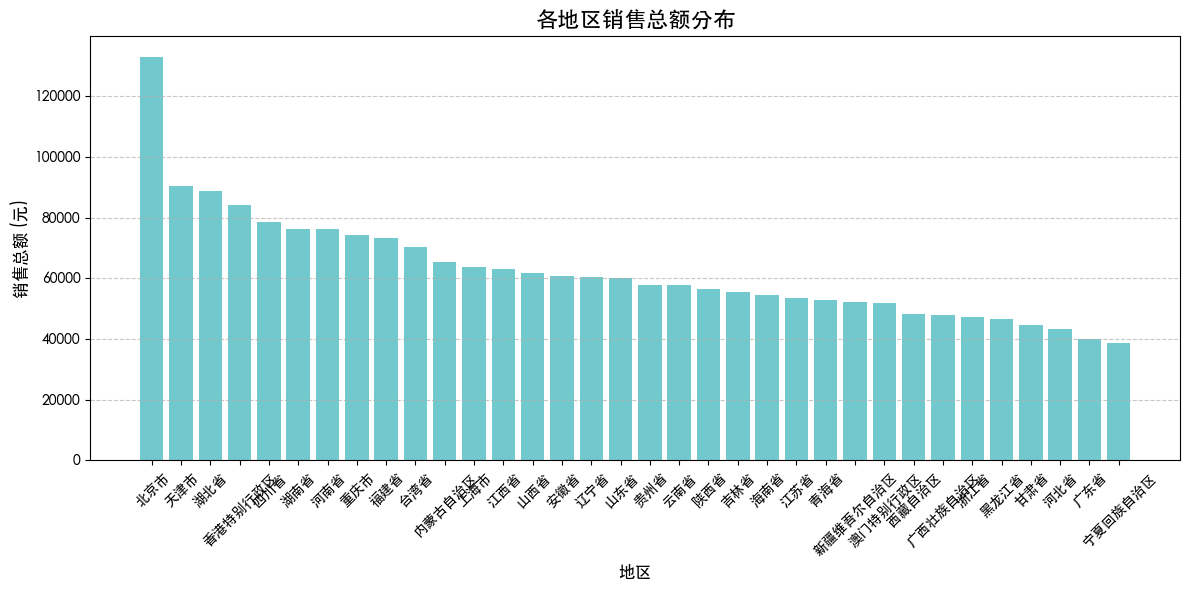

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

users = pd.read_csv("user_unique_compare.csv")
orders = pd.read_csv("erp_order.csv")

# 合并订单与用户信息
merged = pd.merge(orders, users, on="user_id", how="left")

# 计算各地区销售总额
region_sales = merged.groupby("region")["total_amount"].sum().reset_index()
region_sales = region_sales.sort_values(by="total_amount", ascending=False)

plt.figure(figsize=(12,6))
plt.bar(region_sales["region"], region_sales["total_amount"], color="#71c9ce")
plt.title("各地区销售总额分布", fontsize=16)
plt.xlabel("地区", fontsize=12)
plt.ylabel("销售总额 (元)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

从图中看出 北京市以超过12万元的销售额位居榜首，远超第二名天津，其销售额几乎是排名末位地区的3倍以上，显示出极强的市场辐射力和消费能力，是公司业绩增长的核心支柱。

销售分布高度集中于经济发达地区
销售额排名靠前的地区普遍为我国GDP总量高、人口密集、消费能力强的一线及新一线城市或经济大省。这表明公司的销售表现与区域经济发展水平存在明显的正相关关系——经济越发达、居民可支配收入越高、商业环境越成熟，销售潜力越大。

从数据分布看，中西部及部分边疆地区（如宁夏、西藏、甘肃等）销售额相对较低，虽不代表无增长空间，但提示未来拓展需结合当地消费习惯、渠道建设成本及政策支持等因素制定差异化策略。

当前销售结构健康且聚焦高价值市场，建议在巩固北京等核心市场的同时，可针对高GDP但尚未充分开发的潜力区域加大资源投入；对于低销售额地区，则宜采取试点先行、轻资产运营等方式探索增量机会。

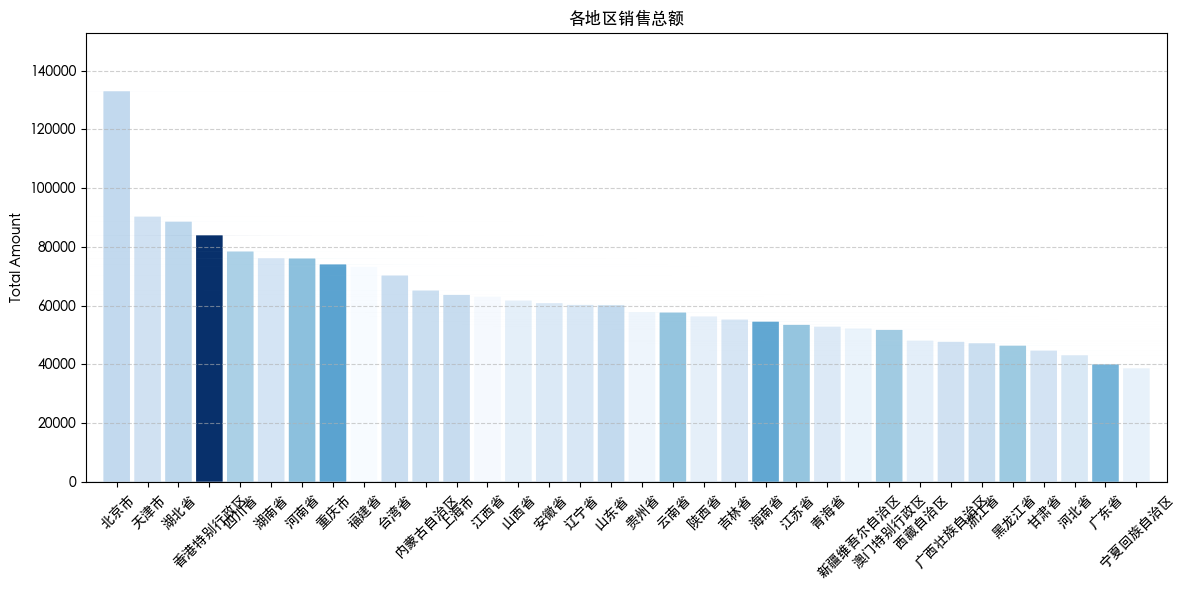

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyBboxPatch
import pandas as pd

region_sales = merged.groupby("region")["total_amount"].sum().reset_index()
region_sales = region_sales.sort_values(by="total_amount", ascending=False)

regions = region_sales["region"].tolist()
values = region_sales["total_amount"].tolist()

fig, ax = plt.subplots(figsize=(12, 6))

norm = (region_sales["total_amount"] - region_sales["total_amount"].min()) / \
       (region_sales["total_amount"].max() - region_sales["total_amount"].min() + 1e-8)

for i, v in enumerate(values):
    x = i - 0.4  # 柱子居中位置
    height = v

    bar = FancyBboxPatch(
        (x, 0),
        0.8,
        height,
        boxstyle="round,pad=0.03,rounding_size=15",
        linewidth=0,
        facecolor=plt.cm.Blues(norm[i])  # 使用渐变颜色映射
    )
    ax.add_patch(bar)

ax.set_xlim(-1, len(regions))
ax.set_ylim(0, max(values) * 1.15)

ax.set_xticks(np.arange(len(regions)))
ax.set_xticklabels(regions, rotation=45)

ax.set_ylabel("Total Amount")
ax.set_title("各地区销售总额")

ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

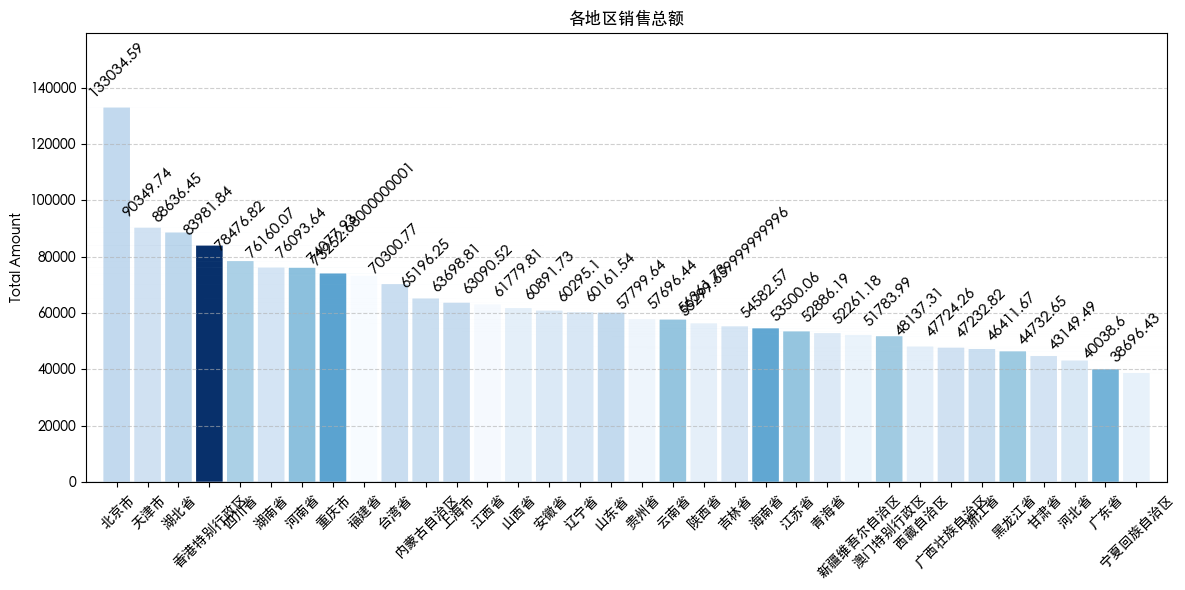

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyBboxPatch
import pandas as pd

region_sales = merged.groupby("region")["total_amount"].sum().reset_index()
region_sales = region_sales.sort_values(by="total_amount", ascending=False)

regions = region_sales["region"].tolist()
values = region_sales["total_amount"].tolist()

fig, ax = plt.subplots(figsize=(12, 6))

norm = (region_sales["total_amount"] - region_sales["total_amount"].min()) / \
       (region_sales["total_amount"].max() - region_sales["total_amount"].min() + 1e-8)

for i, v in enumerate(values):
    x = i - 0.4

    bar = FancyBboxPatch(
        (x, 0),
        0.8,
        v,
        boxstyle="round,pad=0.03,rounding_size=15",
        linewidth=0,
        facecolor=plt.cm.Blues(norm[i])
    )
    ax.add_patch(bar)

    # 数值标签
    ax.text(
        i, v + max(values) * 0.02,
        f"{v}",
        ha="center",
        va="bottom",
        fontsize=11,
        rotation=45
    )

ax.set_xlim(-1, len(regions))
ax.set_ylim(0, max(values) * 1.20)

ax.set_xticks(np.arange(len(regions)))
ax.set_xticklabels(regions, rotation=45)

ax.set_ylabel("Total Amount")
ax.set_title("各地区销售总额")

ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

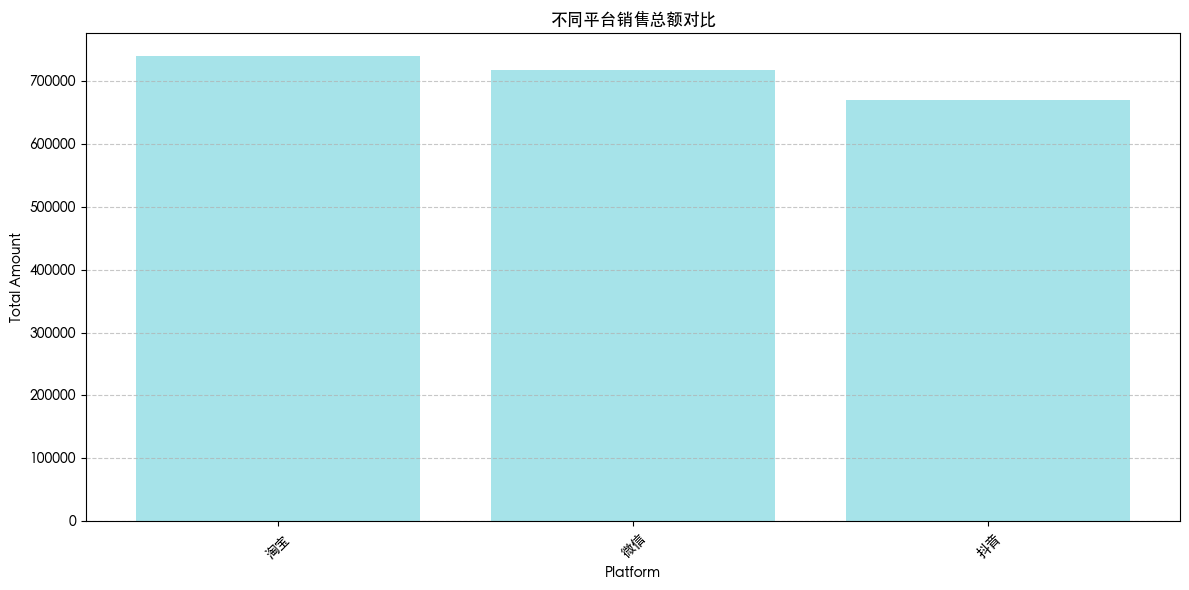

In [3]:
# 计算不同平台的销售总额
platform_sales = merged.groupby("platform")["total_amount"].sum().reset_index()
platform_sales = platform_sales.sort_values(by="total_amount", ascending=False)

plt.figure(figsize=(12,6))
plt.bar(
    platform_sales["platform"], 
    platform_sales["total_amount"], 
    color="#a6e3e9"
    )
    
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("不同平台销售总额对比")
plt.xlabel("Platform")
plt.ylabel("Total Amount")
plt.tight_layout()
plt.show()

从图中看出

淘宝以约 73000元 的销售额位居第一，是公司当前最主要的销售渠道。
微信紧随其后，销售额约为 71000元，与淘宝差距极小，显示出强大的私域流量转化能力。
抖音销售额约为 67000元，虽位列第三，但与前两者差距在可控范围内，表明其作为新兴内容电商渠道已具备稳定贡献能力。
 
淘宝与微信合计占总销售额的约68%，构成公司销售的基本盘。
抖音虽目前稍逊，但作为短视频+直播电商的代表，其增长动能可能更强。建议关注其月度增长率、用户互动率及客单价变化，判断是否值得加大投放或优化内容策略。

建议：
巩固基本盘，继续深耕淘宝与微信，优化商品页面、提升复购率、强化会员体系。
加速抖音布局，针对抖音平台特性，设计专属爆款产品或营销活动，提升转化效率。
建立动态监控机制，定期对比三大平台的ROI、获客成本、用户画像，实现资源动态调配。

当前销售结构呈现“淘宝+微信双引擎驱动，抖音稳步增长”的良性格局，未来应聚焦差异化运营，最大化各平台价值。

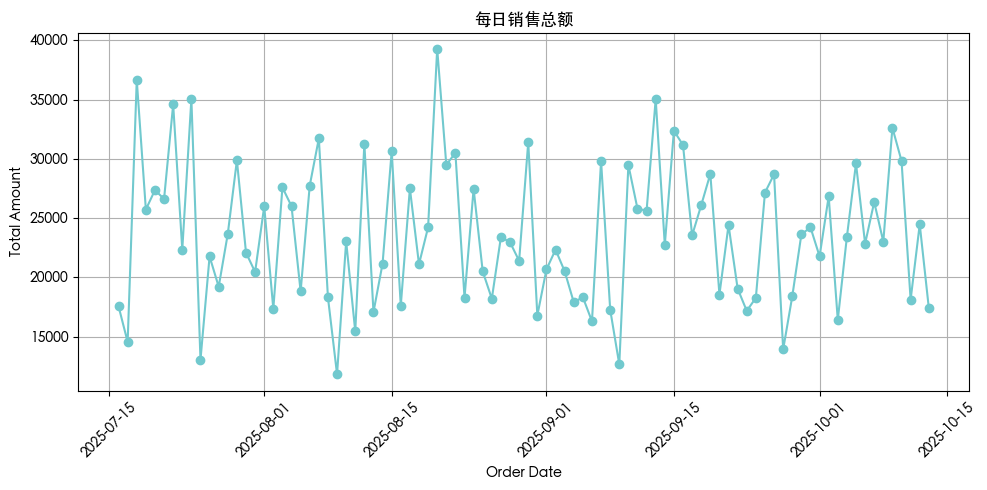

In [ ]:
# 计算每日销售总额
orders['order_date'] = pd.to_datetime(orders['order_date'])

orders = orders.sort_values('order_date')

daily_orders = orders.groupby('order_date')['total_amount'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(
    daily_orders['order_date'], 
    daily_orders['total_amount'], 
    marker='o', 
    color = '#71c9ce'
    )
    
plt.title('每日销售总额')
plt.xlabel('Order Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

从图可见, 销售业绩在2025年7月15日至10月15日期间呈现出显著的周期性波动特征，而非随机起伏.

销售波动呈现清晰的波峰-波谷周期
图中可识别出多个销售高峰，峰值常突破 35000元，甚至接近 40000元。
低谷期则集中在每周中段或月末，最低值约 13000–15000元。
周期长度约为7天，符合周度循环特征，暗示销售受周末消费、用户活跃度或平台活动节奏影响显著。

周期性波动可能源于以下几个因素：
1. 平台促销活动：如淘宝/抖音/微信的大促日往往带动销售爆发，与图中高点高度吻合。
2. 用户行为习惯：周末消费意愿更强，工作日相对低迷，形成自然波动。
3. 内容/广告投放节奏：若公司在特定日期加大短视频或直播投放，也会引发短期销售激增。
建议：
1. 提前布局促销节点,根据历史数据预测未来销售高峰，提前备货、增加客服、优化页面转化。
2. 平滑低谷期销售,在非促销日推出“会员专享日”、“限时秒杀”或“满减券”，刺激消费，减少销售落差。
3. 建立销售-活动关联模型,将每次促销活动的投入与产出进行对比，优化资源分配。

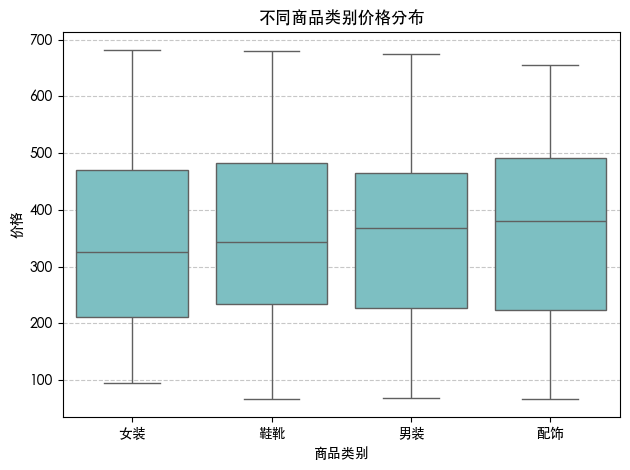

In [ ]:
import seaborn as sns

sku_data_base = pd.read_csv("sku_data_base.csv")

sns.boxplot(
    x="category", 
    y="price", 
    data=sku_data_base, 
    color="#71c9ce"
    )
    
plt.title("不同商品类别价格分布")
plt.xlabel("商品类别")
plt.ylabel("价格")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


从图可见，四类商品在价格结构上存在显著差异

配饰的价格中位数和均值最高，说明其整体定价策略偏高，面向的是对品质、品牌或设计感有更高要求的消费群体。
女装的均值最低，表明其产品线更偏向大众化、高频次、高性价比的日常消费，覆盖人群更广。

女装的最高价格接近 700元，是所有品类中最高的，说明存在少量高端、奢侈或设计师款女装，满足高净值用户的个性化需求。
配饰的最高价格约 650–680元，虽也属高价区间，但上限略低于女装，且其价格分布更集中，波动较小。

愿意为高端女装支付溢价的消费者，其单笔消费能力更强.
配饰的高均值+低波动性，说明其消费群体更稳定、更注重品牌/品质一致性，属于轻奢型、日常精致型消费。

说明女装市场呈现两极分化,既有大量平价基础款，也有少量高价精品，吸引的是“价格敏感+高端尝鲜”并存的多元客群。
配饰市场更统一高端：整体定价偏高，但价格带较窄，目标用户是追求品质生活、愿意为小件精品持续付费的稳定客群。

建议：
女装品类可强化高端线营销，针对高净值客户推出限量款、联名款，提升品牌形象与客单价；同时保留基础款维持流量。
配饰品类应聚焦高复购率与场景搭配，通过组合销售、会员专属款等方式，提升连带率和用户粘性。
交叉销售机会将高端女装与高单价配饰捆绑推荐，利用形象升级心理，刺激高净值客户一站式消费。

In [30]:
spu_manages_feishu = pd.read_csv("spu_manages_feishu.csv")

sku_spu_merged = pd.merge(spu_manages_feishu, sku_data_base, on="spu", how="left")

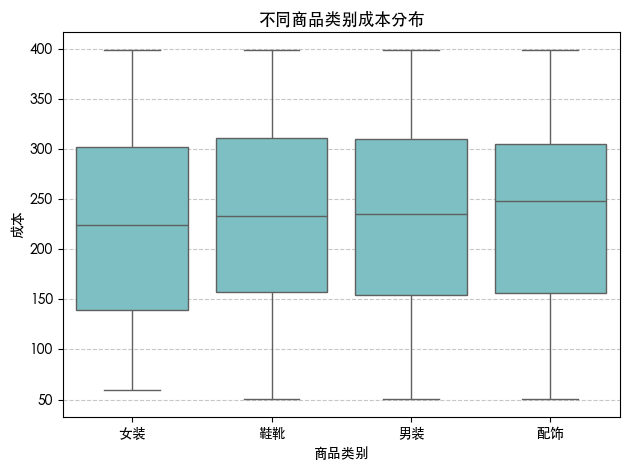

In [ ]:
sns.boxplot(
    x = 'category', 
    y = 'cost', 
    data = sku_spu_merged, 
    color="#71c9ce"
    )
    
plt.title("不同商品类别成本分布")
plt.xlabel("商品类别")
plt.ylabel("成本")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

从图可见，四类商品在生产/采购成本上存在显著差异。

四类商品的成本中位数均集中在 230–250元 区间，说明公司在供应链管理上具备一定标准化能力。
女装的成本分布最广，表明其产品线复杂度高，既有低价快消款，也有高成本设计款。
鞋靴与男装成本分布相对集中，波动较小，反映其生产工艺或选材更稳定。
配饰成本中位数略低，但上限同样接近400元，说明其成本结构与女装类似，存在少量高成本精品。


女装与配饰的平均成本相近，这意味着：
配饰的毛利率更高且更稳定：售价高、成本可控，是典型的轻资产、高毛利品类。
女装的毛利率波动大：平价款利润薄，高端款利润厚，需精细化运营以提升整体盈利水平。

商业策略建议：
配饰打造利润引擎，强化品牌故事与设计感，支撑溢价；推出套装搭配、会员专享等组合销售，提升客单价与复购率。

女装优化结构盈利，提升高端女装占比，通过内容营销引导消费升级；
对平价款进行成本控制+快速周转，避免库存积压。

鞋靴和男装的成本与价格分布较均衡，适合做基础流量款或爆款引流。可尝试联名款或限量款突破价格天花板，提升利润空间。

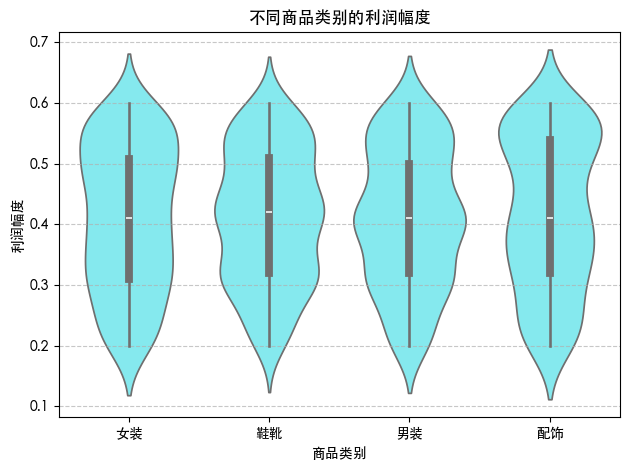

In [37]:
sns.violinplot(
    x = 'category', 
    y = 'profit_margin', 
    data = sku_spu_merged, 
    color="#74f9ff"
    )
    
plt.title("不同商品类别的利润幅度")
plt.xlabel("商品类别")
plt.ylabel("利润幅度")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

从图可见，四类商品在盈利能力和利润分布上存在显著差异.

配饰的利润幅度中位数最高（约 0.55），且分布集中、波动较小,说明高毛利+高稳定性，是当前最优质的利润贡献品类。

女装、鞋靴的中位数利润幅度约为 0.50–0.52，但分布更宽，表明其利润空间有潜力，但也伴随较大风险。

男装利润幅度最低，且分布偏下，说明整体盈利能力较弱，需重点关注成本控制或定价策略。

配饰利润分布高度集中，说明其定价策略成熟、成本控制得当，属于轻投入、稳回报的现金牛品类。
女装虽然均值利润略低于配饰，但其利润分布范围更广，意味着：存在大量高利润单品；也存在低利润甚至亏本引流款。关键在于产品结构优化，提升高利润单品占比。
鞋靴和男装的利润分布相对均衡，但上限不高，适合做流量入口或组合销售，不宜作为主要利润来源。

策略建议：
继续保持高定价、高溢价策略；推出限量款、联名款、会员专属款，进一步抬升利润空间；
用配饰利润反哺其他品类研发与营销。

对女装SKU进行利润分级，将高利润单品重点推广；对低利润单品控制库存、减少生产；
通过穿搭推荐引导用户购买高利润组合。

将鞋靴和男装定位为引流+搭配品类，通过满减、搭配套餐提升连带率；探索定制化或功能型产品。

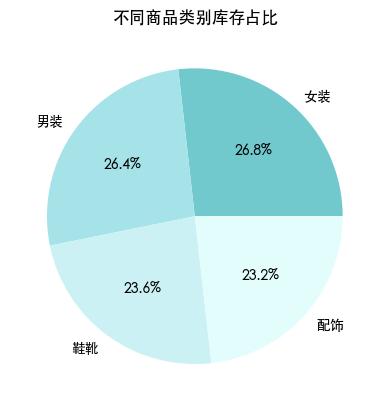

In [ ]:
colors = ['#71c9ce', '#a6e3e9', '#cbf1f5', '#e3fdfd']

plt.pie(
    sku_spu_merged['category'].value_counts(), 
    labels=sku_spu_merged['category'].value_counts().index, 
    colors = colors,
    autopct='%1.1f%%'
    )

plt.title("不同商品类别库存占比")
plt.show()

可以看到
女装库存占比高，但利润波动大,若大量库存为平价款，可能导致滞销、打折、压仓，影响整体利润。
配饰库存占比低，但利润高、需求稳定,存在供不应求、错失销售机会的风险。
鞋靴和男装库存占比适中，但利润偏低，需控制库存周转率，避免积压。

建议：优化库存结构，提升资金效率与盈利能力

将配饰库存占比提升至 25%–28%，与其高利润贡献相匹配；增加高频复购款、经典款、联名款的备货量，减少低动销SKU。

对女装SKU进行销售-利润-库存三维度评估

建立动态库存预警机制，设置各品类的安全库存线和最大库存上限；结合销售预测、促销计划、季节因素，实现按需补货、精准投放。

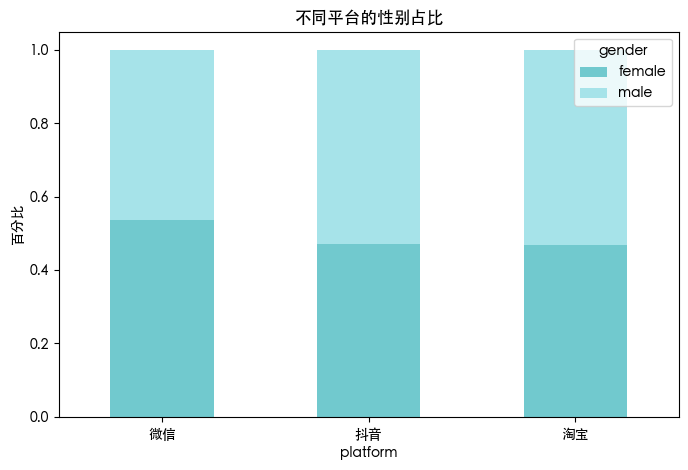

In [ ]:
counts = users.groupby(['platform', 'gender']).size().unstack()
counts_pct = counts.div(counts.sum(axis=1), axis=0)

counts_pct.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8,5),
    color=["#71c9ce", "#a6e3e9"]
    )
    
plt.ylabel('百分比')
plt.title('不同平台的性别占比')
plt.xticks(rotation=0)
plt.show()


微信中女性用户占比稍高，符合微信作为社交+生活服务平台的属性。
用户更倾向于通过朋友圈、社群、公众号等渠道进行“信任型消费”，适合推广高复购、高粘性的品类。

建议强化KOC种草、社群裂变、会员专属福利，提升女性用户的转化与忠诚度。

抖音中男性略占优，男性用户首次超过女性，反映抖音作为短视频+直播平台，更吸引对科技、运动、汽车、游戏等内容感兴趣的男性群体。但需注意，女性仍是重要消费力量，尤其在服饰、美妆、家居等领域。
针对男性用户，推出功能型、性价比型、测评类内容；
针对女性用户，强化穿搭、颜值、情感共鸣类内容，提升转化率。

淘宝中是男性主导，说明淘宝仍是主动搜索+比价决策的核心阵地，男性更习惯在此完成理性消费。


策略建议：
优化搜索关键词与商品详情页，满足男性用户的效率型需求；
对女性用户加强场景化推荐，提升点击与转化。


高利润品类主推微信+抖音，因为这两个平台女性用户占比高，而配饰是典型的女性驱动型品类，适合通过内容种草、社交分享等方式激发购买。

大众流量品类主推淘宝+抖音
利用淘宝的搜索流量和抖音的内容曝光，覆盖男性用户为主的消费场景。

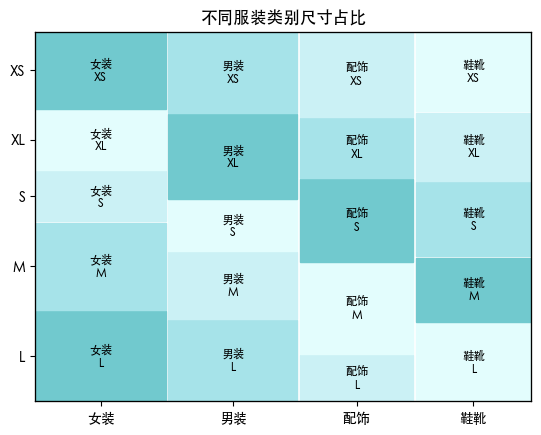

In [47]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

color_list = ["#71c9ce", "#a6e3e9", "#cbf1f5", "#e3fdfd"]
color_dict = {k: color_list[i % len(color_list)] for i, k in enumerate(data.index)}

data = sku_data_base.groupby(['category', 'size']).size()
mosaic(data, properties=lambda key: {'color': color_dict[key]})
plt.title('不同服装类别尺寸占比')
plt.show()

可以看到 不同服装的尺寸是不同的 男装的尺寸普遍偏大 女装和配饰的尺寸普遍偏小

这是因为 男性的体格通常会比女性的体格大 因此 男性会购买更大的男装 而女性会购买更小的女装和配i饰

从图可见，四类商品在各尺码段的分布存在显著差异


女装L码占比最大，说明当前女装主力消费群体偏向中大码，符合当下“包容性时尚”趋势；
M码次之，仍是重要基础款尺寸；S/XS码占比较小，可能面向小众市场或特定人群；XL码有明显占比，表明公司已开始覆盖大码女装需求，但仍有提升空间。可进一步细分“L码”为“L/M”、“L/XL”，以满足不同体型用户的精准需求。 

男装M码占比最大，合男性主流体型分布；L码次之，也是重要消费群体；XL码有稳定占比；S/XS码占比较小，面向青少年或偏瘦体型人群，可作为补充款。建议：可推出修身款、宽松款等风格化尺码，提升男性用户的个性化选择。 

配饰S码占比最大，符合配饰小巧精致的产品特性，如项链、手链、耳环等；M/L码也有一定占比，可能涵盖围巾、帽子、腰带等大件配饰；XS/XL码占比较小，可能为特殊定制款或限量款。
建议强化S码主力款的SKU丰富度，同时开发M/L码场景化配饰。

鞋靴M码占比最大，符合男女通用的基础鞋码；L码次之，主要面向男性或脚型较大的女性；S/XS码占比较小，面向青少年或小脚型女性；XL码有稳定占比，可能为运动鞋、工装靴等大码鞋款。

<Figure size 1200x600 with 0 Axes>

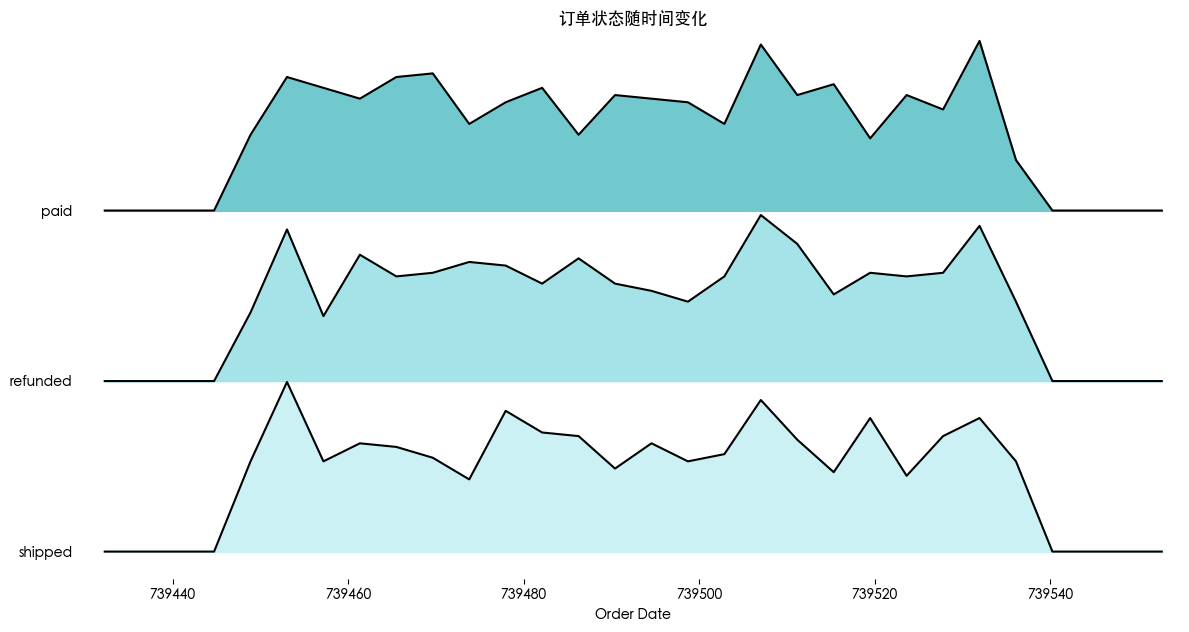

In [ ]:
import matplotlib.pyplot as plt
from joypy import joyplot
import pandas as pd

orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['date_num'] = orders['order_date'].map(pd.Timestamp.toordinal)

plt.figure(figsize=(12,6))
joyplot(
    data=orders,
    by='status',
    column='date_num',
    overlap=0.5,
    kind='counts', 
    bins=30,
    color=["#71c9ce", "#a6e3e9", "#cbf1f5"],
    figsize=(12,6)
)
plt.xlabel('Order Date')
plt.ylabel('Status')
plt.title('订单状态随时间变化')
plt.show()

可以看到 商品支付后发货的数量也立即上升 说明客户在购买商品后仓库会立即发货

表明平台的库存管理系统是完善的 客户在购买商品后仓库会立即发货

然而在客户支付后 退款的比例也在增大 说明客户在下单后可能会因为某些原因而退款

我认为我们可以在客户退款后请求客户提供退款的原因 并根据客户的退款原因来调整我们的业务策略

/var/folders/yt/dl86x1493y18124bcx2hmh780000gn/T/ipykernel_60532/1905016273.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


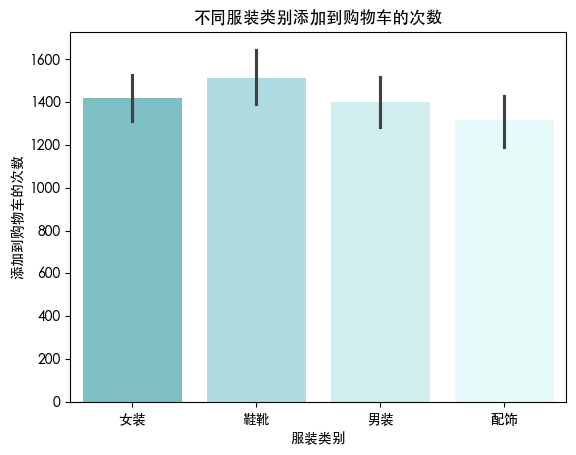

In [4]:
import seaborn as sns

new_sku_sales = pd.read_csv("new_sku_sales.csv")
sku_data_base = pd.read_csv("sku_data_base.csv")

new_sku_merged = pd.merge(new_sku_sales, sku_data_base, on='sku', how='left')

sns.barplot(
    data=new_sku_merged,
    x='category',
    y='add_to_cart',
    palette = ['#71c9ce', '#a6e3e9', '#cbf1f5', '#e3fdfd']
)
plt.title('不同服装类别添加到购物车的次数')
plt.xlabel('服装类别')
plt.ylabel('添加到购物车的次数')
plt.show()

可以看到 鞋靴加入购物车次数最多 配饰加入购物车次数最少
说明 客户在购买配饰时会更加果断 直接购买 而在购买鞋靴时会更加谨慎 先加入购物车后查看详情

鞋靴加购次数最高,说明其在视觉呈现、价格吸引力或功能描述上最能激发用户兴趣；女装紧随其后,符合其作为主力品类的地位,用户浏览意愿强；男装略低于女装,表明男性用户在购物车决策上可能更理性、更谨慎；配饰加购次数最低,虽然其利润高、复购率高,但在“吸引用户加购”环节表现较弱。
这说明配饰是高利润+低加购的矛盾体 —— 用户可能不主动加购，但一旦进入购买流程，转化率极高。 

建议：
在商品详情页强化搭配场景;设置加购即送小样、满额赠配饰等钩子，刺激用户加购；利用微信、抖音的内容种草，引导用户先加购再决策。


对高加购但低成交的商品进行痛点诊断推出限时折扣、库存紧张提示、已售XX件等心理暗示，加速用户决策；设置购物车提醒、放弃加购召回等自动化营销工具。

将各品类的加购次数、下单次数、客单价、利润率进行关联分析；识别真正的高价值品类.

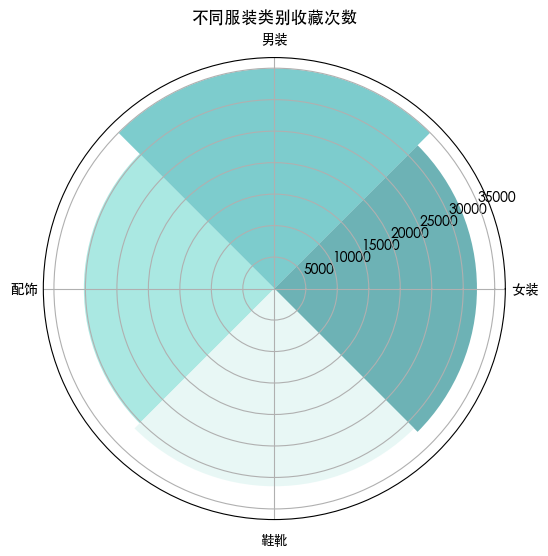

In [72]:
import numpy as np

category_counts = new_sku_merged.groupby('category')['favorite'].sum()
labels = category_counts.index
sizes = category_counts.values

theta = np.linspace(0.0, 2 * np.pi, len(labels), endpoint=False)
radii = sizes
width = 2 * np.pi / len(labels)

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
bars = ax.bar(
    theta, 
    radii, 
    width=width, 
    bottom=0.0, 
    color=['#2f9296', '#46b7b9', '#87dfd6', '#dff5f2'], 
    alpha=0.7
    )

ax.set_xticks(theta)
ax.set_xticklabels(labels)
plt.title('不同服装类别收藏次数')
plt.show()

可以看到 男装的收藏次数最高 说明客户在购买男装时会更加谨慎 收藏后再购买

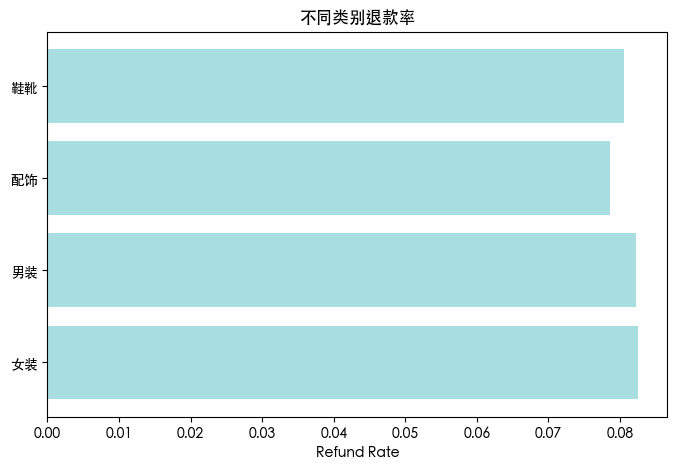

In [ ]:
category_refund = new_sku_merged.groupby('category')['refund_rate'].mean().reset_index()

plt.figure(figsize=(8,5))
bars = plt.barh(category_refund['category'], category_refund['refund_rate'], color='#71c9ce', alpha=0.6)
plt.xlabel('Refund Rate')
plt.title('不同类别退款率')
plt.show()

可以看到 女装的退款率较高 这可能与女装购买后客户对服装尺寸的错误估计有关

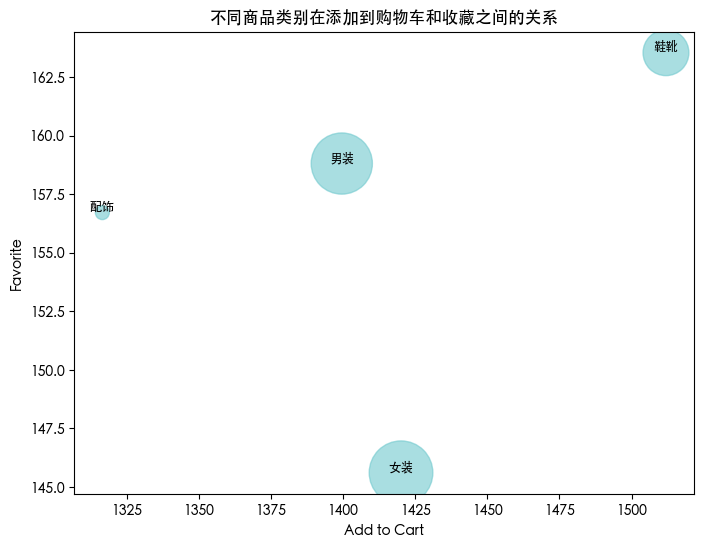

In [89]:
import numpy as np

sizes = (category_stats['refund_rate'] - category_stats['refund_rate'].min()) / \
        (category_stats['refund_rate'].max() - category_stats['refund_rate'].min())
sizes = sizes * 2000 + 100

plt.figure(figsize=(8,6))
plt.scatter(
    category_stats['add_to_cart'],
    category_stats['favorite'],
    s=sizes,
    alpha=0.6,
    color='#71c9ce'
)
for i, row in category_stats.iterrows():
    plt.text(row['add_to_cart'], row['favorite'], row['category'], fontsize=9, ha='center', va='bottom')
plt.xlabel('Add to Cart')
plt.ylabel('Favorite')
plt.title('不同商品类别在添加到购物车和收藏之间的关系')
plt.show()

可以看到 女装在添加到购物车和添加到收藏之间会更倾向于添加到购物车 说明客户在购买女装时会更加果断 直接添加到购物车

配饰和男装在添加到购物车和添加到收藏之间的倾向是相似的 都是倾向于添加到收藏 说明客户在购买配饰和男装时会更加谨慎 收藏后再购买

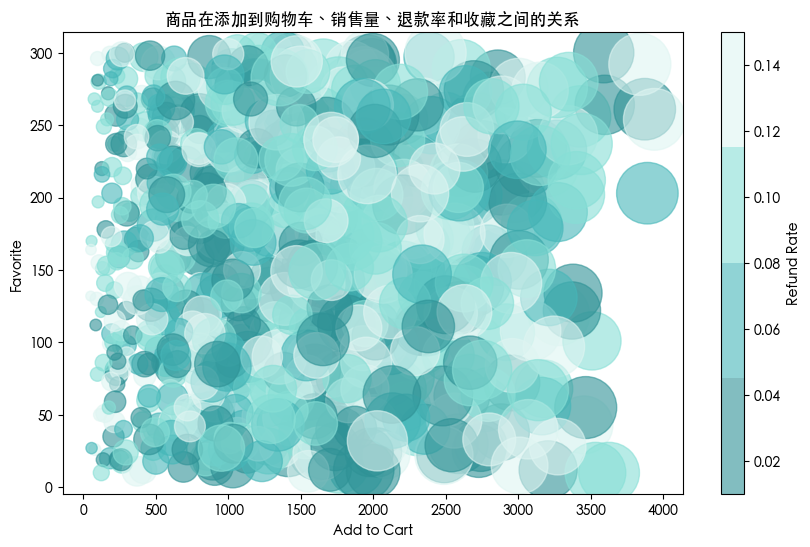

In [ ]:
from matplotlib.colors import ListedColormap

custom_colors = ['#2f9296', '#46b7b9', '#87dfd6', '#dff5f2']
custom_cmap = ListedColormap(custom_colors)

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    new_sku_sales[['add_to_cart']],
    new_sku_sales[['favorite']],
    s=new_sku_sales['sales'],
    c=new_sku_sales['refund_rate'],
    cmap=custom_cmap,
    alpha=0.6
)
plt.xlabel('Add to Cart')
plt.ylabel('Favorite')
plt.title('商品在添加到购物车、销售量、退款率和收藏之间的关系')
plt.colorbar(scatter, label='Refund Rate')
plt.show()

从图中可见：
大多数商品集中在左下角区域，说明大部分商品属于低热度、低转化的商品；
少数商品位于右上角，是真正的爆款+高人气单品；
气泡大小差异巨大，有些商品虽然加购和收藏不高，但销量极高，可能是精准匹配型或复购型商品；

虽然部分商品销量高，但如果退款率高，其实际净利润可能被严重侵蚀；一些加购和收藏不高，但退款率极低的商品，可能是高忠诚度、高复购的隐形冠军。

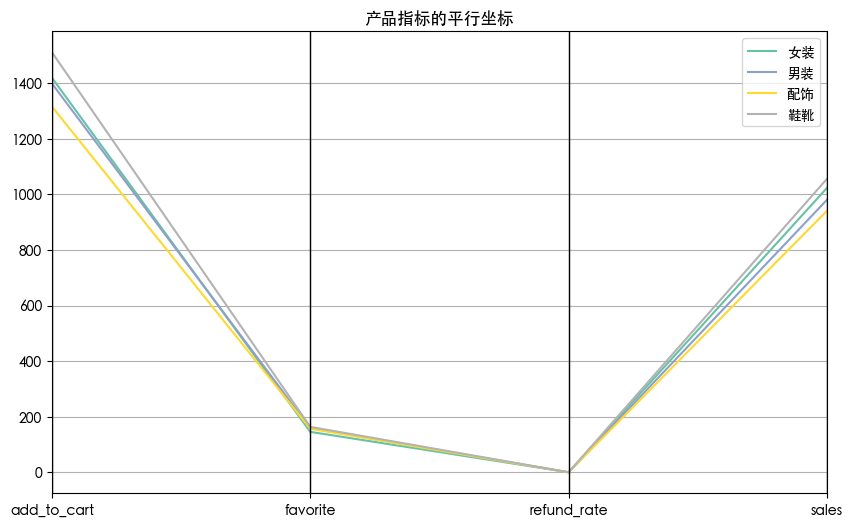

In [98]:
category_stats = new_sku_merged.groupby('category')[['add_to_cart','favorite','refund_rate','sales']].mean().reset_index()

plt.figure(figsize=(10,6))
parallel_coordinates(
    category_stats,
    class_column='category',
    colormap=plt.get_cmap("Set2")
)
plt.title('产品指标的平行坐标')
plt.show()

所有品类 加购->收藏->退款率->销量 呈U型走势

所有品类的线条都呈现先大幅下降 再急剧上升的形态

说明加购量远高于收藏量 退款率普遍极低 但最终销量又回升至接近加购水平

建议：分品类施策，最大化整体效益

打造鞋靴爆款矩阵，覆盖不同风格；强化搭配推荐，提升连带率；设置限时折扣、满额赠礼等钩子，加速转化。

优化女装结构
保持高转化优势，同时提升收藏率；对高退款率SKU进行整改或淘汰，确保口碑稳定。

提升“收藏-转化”效率，优化商品详情页，减少实物与图片不符导致的退款；推出场景化配饰组合，提升客单价。

优化尺码推荐系统，减少因尺码错误导致的退货；
增加“功能型或风格化款式，提升差异化竞争力；
利用男性用户偏好设计营销内容。

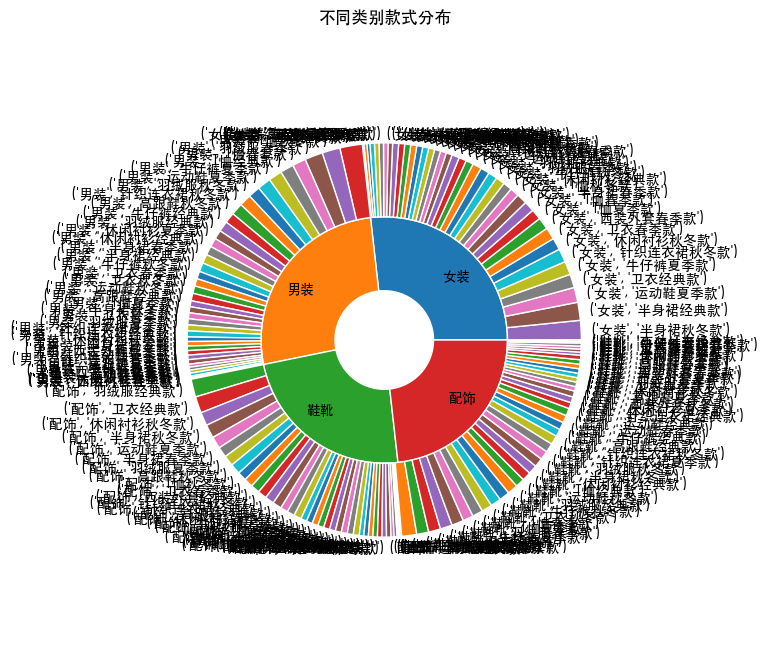

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

category_counts = sku_data_base['category'].value_counts()
style_counts = sku_data_base.groupby('category')['name'].value_counts()

inner_sizes = category_counts.values
inner_labels = category_counts.index

outer_sizes = style_counts.values
outer_labels = style_counts.index

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(inner_sizes, radius=0.5, labels=inner_labels, labeldistance=0.7, wedgeprops=dict(width=0.3, edgecolor='w'))

ax.pie(outer_sizes, radius=0.8, labels=outer_labels, labeldistance=1.05, wedgeprops=dict(width=0.3, edgecolor='w'))

plt.title("不同类别款式分布")
plt.show()

这张图说明鞋靴的具体类别款式要多于其他品类 而配饰的具体类别款式最少 

In [ ]:
import plotly.express as px

fig = px.sunburst(
    sku_data_base,
    path=['category','name'],
    values=None,
    color='category',
    title="不同类别款式分布"
)
fig.show()

这张图说明鞋靴的具体类别款式要多于其他品类 而配饰的具体类别款式最少 

In [115]:
import plotly.express as px

fig = px.treemap(
    sku_data_base,
    path=['category','name'],
    values=None,
    color='category',
    title="不同类别款式分布"
)
fig.show()

从矩形数量和密度来看

女装款式最丰富，矩形最多、最小，说明其SKU高度碎片化，覆盖了从“半身裙”到“运动鞋”等多种细分场景

男装款式数量次之，但大块矩形较多 说明其核心爆款款式的集中度更高

鞋靴款式相对集中，大块矩形明显 可能意味着鞋靴类更依赖少数主力款式驱动销量

配饰款式数量多，但矩形普遍较小，说明配饰品类高度分散，单品SKU多但单款体量小，属于“长尾市场”

说明女装和配饰是“广而深”的品类，男装和鞋靴是“精而专”的品类

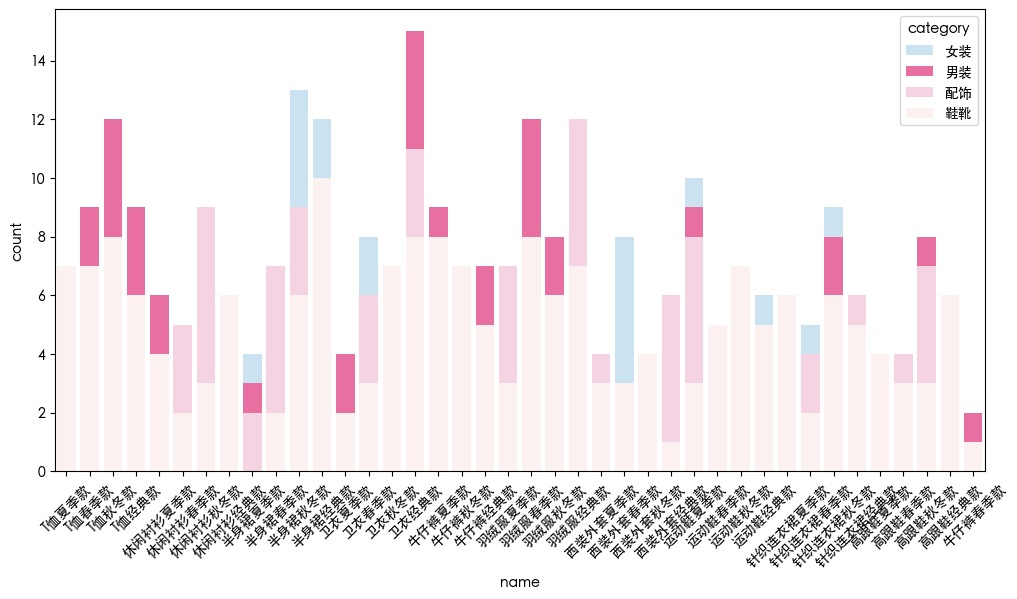

In [120]:
category_style_counts = sku_data_base.groupby(['category','name']).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.barplot(
    data=category_style_counts,
    x='name',
    y='count',
    hue='category',
    dodge=False,
    palette = ['#c5e3f6', '#fc5c9c', '#fccde2', '#fcefee']
)
plt.xticks(rotation=45)
plt.show()

多数款式集中在1~3个品类，少数跨品类爆款

大部分柱子高度在5~12之间，说明大多数款式在平台上有一定SKU覆盖。

少数柱子特别高 达到14~15，说明这些是跨品类、多SKU的超级爆款款式。

有些柱子非常矮 说明这些款式SKU少，可能是新品、小众款或清库存款。

In [ ]:
import plotly.graph_objects as go

# 统计每个 category-name 的数量
category_counts = sku_data_base.groupby(['category','name']).size().reset_index(name='count')

# 节点标签
categories = list(category_counts['category'].unique())
names = list(category_counts['name'].unique())
labels = categories + names

source_indices = category_counts['category'].apply(lambda x: categories.index(x))
target_indices = category_counts['name'].apply(lambda x: names.index(x) + len(categories))  # name 索引要加类别长度

values = category_counts['count']

fig = go.Figure(go.Sankey(
    node=dict(
        label=labels,
        pad=15,
        thickness=20,
        color=["skyblue"]*len(categories) + ["lightgreen"]*len(names)
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
))

fig.update_layout(title_text="类别到款式的数量流", font_size=12)
fig.show()

整体结构是品类到款式的流量分布高度分散

从左侧四大品类出发，流带迅速扩散到右侧数十个款式，说明

每个品类都覆盖了大量细分款式，SKU结构高度碎片化。 

没有出现“某一个款式独占大比例流量”的情况，说明平台没有绝对的“超级爆款款”，而是多点开花、长尾分布。

In [ ]:
import plotly.graph_objects as go

progress = 72

fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = progress,
    delta = {'reference': 100, 'increasing': {'color': "RebeccaPurple"}},
    gauge = {
        'axis': {'range': [0, 100], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': "#71c9ce"},
        'bgcolor': "white",
        'borderwidth': 2,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, 50], 'color': '#e3fdfd'},
            {'range': [50, 80], 'color': '#a6e3e9'},
            {'range': [80, 100], 'color': '#71c9ce'}
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': progress
        }
    },
    title = {'text': "任务完成率"}
))

fig.update_layout(
    paper_bgcolor="white",
    font={'color': "darkblue", 'family': "Arial"},
    height=400,
    width=500
)
fig.show()

这张图说明了当前的完成率是72% 还差28%

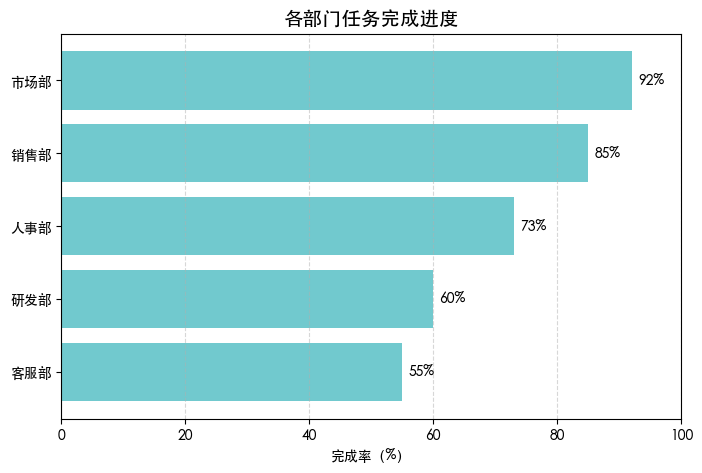

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame({
    'department': ['销售部', '研发部', '市场部', '人事部', '客服部'],
    'progress': [85, 60, 92, 73, 55]
})

data = data.sort_values('progress')

plt.figure(figsize=(8, 5))
bars = plt.barh(data['department'], data['progress'], color='#71c9ce')

for bar, value in zip(bars, data['progress']):
    plt.text(value + 1, bar.get_y() + bar.get_height()/2, f'{value}%', va='center')

plt.title('各部门任务完成进度', fontsize=14)
plt.xlabel('完成率（%）')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

上图说明‘公司整体任务推进情况良好，但部门间存在明显差距。市场部和销售部表现优异，而研发部和客服部是当前的瓶颈

In [5]:
import plotly.express as px
import pandas as pd

data = pd.DataFrame({
    'month': ['1月','1月','1月','2月','2月','2月','3月','3月','3月'],
    'department': ['销售部','研发部','市场部']*3,
    'progress': [60,45,55,70,65,60,85,80,75]
})

fig = px.bar(
    data,
    x='progress',
    y='department',
    animation_frame='month',
    orientation='h',
    range_x=[0,100],
    color='progress',
    color_continuous_scale='Blues',
    text='progress',
    title='各部门任务完成竞速图'
)
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

上图可以看到 研发部门进度在增快

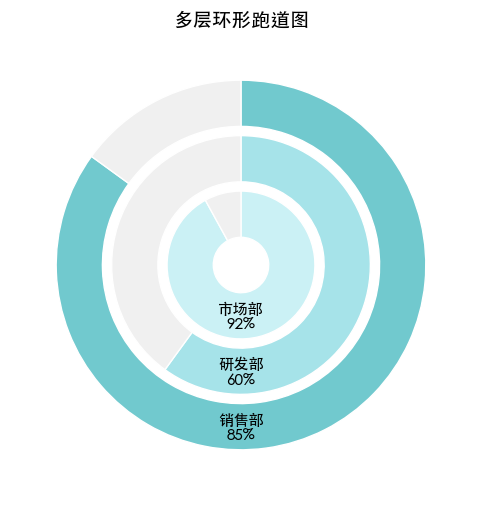

In [8]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['销售部', '研发部', '市场部']
progress = [85, 60, 92]
colors = ['#71c9ce', '#a6e3e9', '#cbf1f5']

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))

radii = [1.0, 0.7, 0.4]
for r, p, c, l in zip(radii, progress, colors, labels):
    ax.pie(
        [p, 100-p],
        radius=r,
        startangle=90,
        colors=[c, '#f0f0f0'],
        counterclock=False,
        wedgeprops=dict(width=0.25, edgecolor='white')
    )
    ax.text(0, -r + 0.12, f"{l}\n{p}%", ha='center', va='center', fontsize=11)

plt.title("多层环形跑道图", fontsize=14)
plt.show()

上图说明‘公司整体任务推进情况良好，但部门间存在明显差距。市场部和销售部表现优异

In [11]:
import plotly.express as px
import pandas as pd

data = pd.DataFrame({
    'department': ['销售部', '研发部', '市场部', '人事部', '客服部'],
    'progress': [85, 60, 92, 73, 55]
})

fig = px.bar(
    data,
    x='progress',
    y='department',
    orientation='h',
    text='progress',
    color='progress',
    color_continuous_scale=['#a6e3e9', '#71c9ce', '#2a9d8f'],
    title='各部门任务完成情况'
)
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(xaxis=dict(range=[0,100]), yaxis_title=None)
fig.show()

上图说明‘公司整体任务推进情况良好，但部门间存在明显差距。市场部和销售部表现优异，而研发部人事部和客服部是当前的瓶颈